# **Lab 7: Optimization and learning**
**Jacob Wahlgren**

# **Abstract**

Gradient descent is an algorithm to solve minimization problems. This report implements the algorithm in $R^n$ and analyzes its accuracy and convergence.

#**About the code**

The code was written by Jacob Wahlgren, based on a template by Johan Hoffman.

In [29]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)
# Copyright (C) 2021 Jacob Wahlgren (jacobwah@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# **Introduction**

In minimization problems the task is to find a minimum point of a function $f(x)$ in some domain $D$. That is, find $x^*\in D$ such that

$\displaystyle f(x^*) \leq f(x) \quad \forall x \in D.$

One algorithm to solve this type of problem is gradient descent, which uses the gradient

$\displaystyle \nabla f = \Big(\frac{df}{dx_1},\frac{df}{dx_2},...\Big)^T$

to find a direction along which the function is decreasing.

# **Method**

First some general definitions. The `SOS` class represents a sum of squares function

$\displaystyle f(x) = \sum_{i=1}^{n} (x_i-a_i)^2$

which is used for testing, since it is convex and has a unique global minimum that is easily found as the coordinates $a$.

In [31]:
TOL = 1e-2

class SOS:
    def __init__(self, x0):
        self.x0 = x0
        self.n = len(x0)
    
    def __call__(self, x):
        return sum((x[i]-self.x0[i])**2 for i in range(self.n))
    
    def grad(self, x):
        return np.array([2*(x[i]-self.x0[i]) for i in range(self.n)])

### Gradient descent in $R^n$

As input we receive a function $f(x): R^n \rightarrow R$. Using the gradient the algorithm locates a stationary point $x^*$, i.e. where $\|\nabla f(x^*)\| < \text{TOL}$. I use the step size $\frac{1}{10}||Df||$ since it is easy to compute.

In [32]:
def gradient_descent_steps(f):
    x = np.zeros(f.n)
    steps = [x]
    while True:
        Df = f.grad(x)
        if np.linalg.norm(Df) <= TOL:
            break
        alpha = get_step_length(f, Df, x)
        x = x - alpha * Df
        steps.append(x)
    return np.array(steps)

def gradient_descent(f):
    return gradient_descent_steps(f)[-1]

def get_step_length(f, Df, x):
    return np.linalg.norm(Df)*0.1

# **Results**

### Gradient descent in $R^n$

Each iteration of the algorithm gets closer to the goal. The plot below shows all the $x^{(k)}$ as blue dots and the red cross marks the true minimum. The initial point $x^{(0)}$ is the origin.

Text(0, 0.5, '$x_2$')

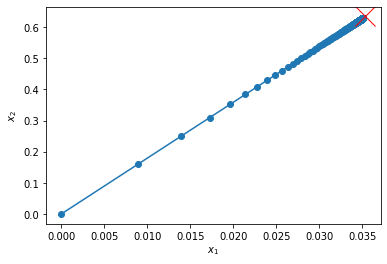

In [33]:
x0 = np.random.rand(2)
f = SOS(x0)
assert f(x0) == 0
xs = gradient_descent_steps(f)

plt.plot(xs[:,0], xs[:,1], '-o')
plt.plot([x0[0]], [x0[1]], marker='x', c='red', markersize=20)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

The error $\|x^{(k)}-x^*\|$ decreases quickly in the first few iterations. Note the log scale.

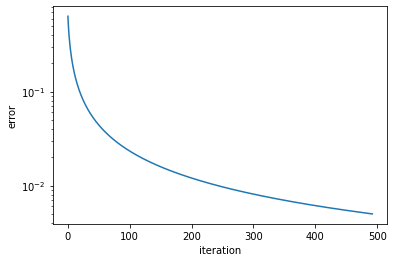

In [34]:
plt.plot(np.arange(len(xs)), [np.linalg.norm(x-x0) for x in xs])
plt.xlabel('iteration')
plt.ylabel('error')
plt.yscale('log')

The algorithm works well in higher dimensional space too. The below graph is the error in a problem with 60 dimensions.

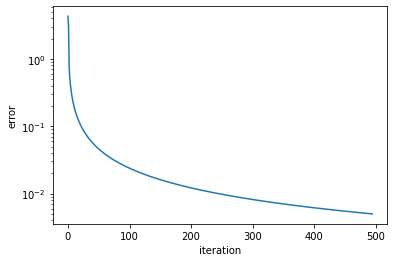

In [35]:
x0 = np.random.rand(60)
f = SOS(x0)
assert f(x0) == 0
xs = gradient_descent_steps(f)
plt.plot(np.arange(len(xs)), [np.linalg.norm(x-x0) for x in xs])
plt.xlabel('iteration')
plt.ylabel('error')
plt.yscale('log')

# **Discussion**

Gradient descent seems like a simple and useful algorithm to solve minimization problems where the gradient is available. To achieve good performance the step length must be adapted to the problem. In the case of line search for instance, the type of problem I used in testing could be solved in a single iteration.